In [ ]:
#Goal: Predict the Future Career of a student based on features like programming skills, GPA, interest, and projects.
#Target Variable: Future Career
# Type of Problem: Classification, because the target (Future Career) is categorical with labels like:

#"Data Scientist"

#"Web Developer"

#"Machine Learning Researcher"



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
df =pd.read_csv(r"C:\Users\ANUSHA\Downloads\archive (7)\cs_students.csv")


In [9]:
df.head


<bound method NDFrame.head of      Student ID            Name  Gender  Age  GPA             Major  \
0             1      John Smith    Male   21  3.5  Computer Science   
1             2   Alice Johnson  Female   20  3.2  Computer Science   
2             3    Robert Davis    Male   22  3.8  Computer Science   
3             4    Emily Wilson  Female   21  3.7  Computer Science   
4             5   Michael Brown    Male   23  3.4  Computer Science   
..          ...             ...     ...  ...  ...               ...   
175         176    Elijah Davis    Male   22  3.7  Computer Science   
176         177    Emma Johnson  Female   20  3.6  Computer Science   
177         178     Liam Wilson    Male   21  3.4  Computer Science   
178         179  Sophia Johnson  Female   22  3.5  Computer Science   
179         180   Michael Brown    Male   23  3.7  Computer Science   

           Interested Domain                     Projects  \
0    Artificial Intelligence          Chatbot Developmen

In [7]:
df.isnull().sum()

Student ID           0
Name                 0
Gender               0
Age                  0
GPA                  0
Major                0
Interested Domain    0
Projects             0
Future Career        0
Python               0
SQL                  0
Java                 0
dtype: int64

<Axes: title={'center': 'Career Distribution'}, ylabel='Future Career'>

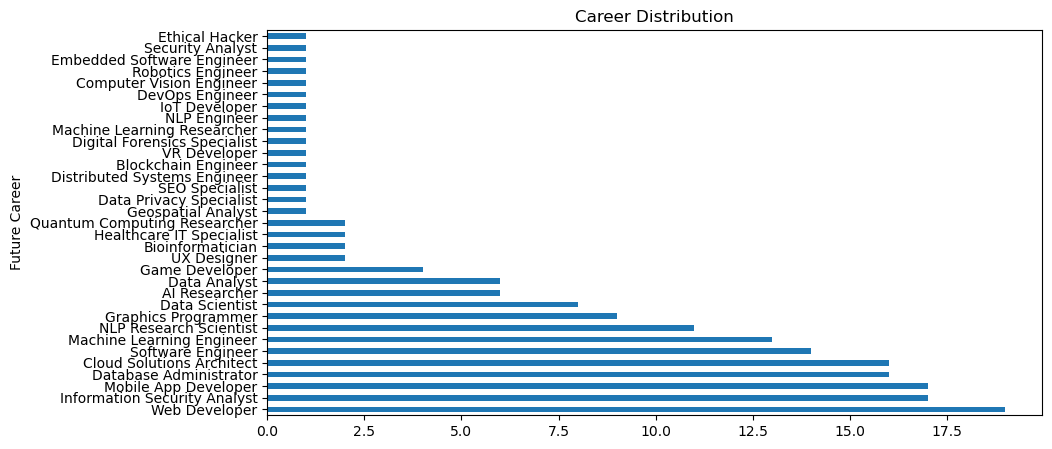

In [11]:
df['Future Career'].value_counts().plot(kind='barh', figsize=(10,5), title='Career Distribution')

In [13]:
df['Interested Domain'].value_counts()
df['Python'].value_counts()

Python
Strong     70
Weak       64
Average    46
Name: count, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [21]:
# Drop ID and Name
df_ml = df.drop(columns=['Student ID', 'Name', 'Major'])

In [25]:
# Encode categorical columns
le = LabelEncoder()
for col in df_ml.columns:
    if df_ml[col].dtype == 'object':
        df_ml[col] = le.fit_transform(df_ml[col])

In [31]:
# Split data
X = df_ml.drop('Future Career', axis=1)
y = df_ml['Future Career']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         1
           3       0.83      1.00      0.91         5
           5       0.33      1.00      0.50         1
           7       1.00      1.00      1.00         1
           8       0.40      1.00      0.57         2
          11       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       1.00      1.00      1.00         1
          16       0.50      1.00      0.67         1
          17       0.00      0.00      0.00         1
          18       0.67      1.00      0.80         2
          19       0.00      0.00      0.00         1
          20       1.00      0.50      0.67         2
          22       1.00      0.50      0.67        10
          24       0.00      0.00      0.00         0
          29       0.00      0.00      0.00         0
          32       1.00    